## 2.3.4 나이브 베이즈 분류기

In [3]:
import numpy as np

In [4]:
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y= np.array([0,1,0,1])

In [5]:
counts= {}
for label in np.unique(y):
    counts[label]=X[y==label].sum(axis=0)
    
    
print("특성 카운트: \n",counts)

특성 카운트: 
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## 2.3.5 결정 트리

In [6]:
import mglearn

In [7]:
!pip install graphviz

In [8]:
#mglearn.plots.plot_animal_tree()

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer() # 유방암 데이터
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [10]:
# 사전 가지치기
tree =DecisionTreeClassifier(max_depth=4, random_state=0) 
tree.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [11]:
# 시각화

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성","양성"], feature_names=cancer.feature_names, impurity=False, filled=True)

In [12]:
import graphviz

In [13]:
#with open("tree.dot",encoding='UTF-8') as f:
#    dot_graph = f.read()
#display(graphviz.Source(dot_graph))

In [14]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [15]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
from matplotlib import font_manager, rc
plt.rc('font', family='NanumGothic')

D:\anaconda\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


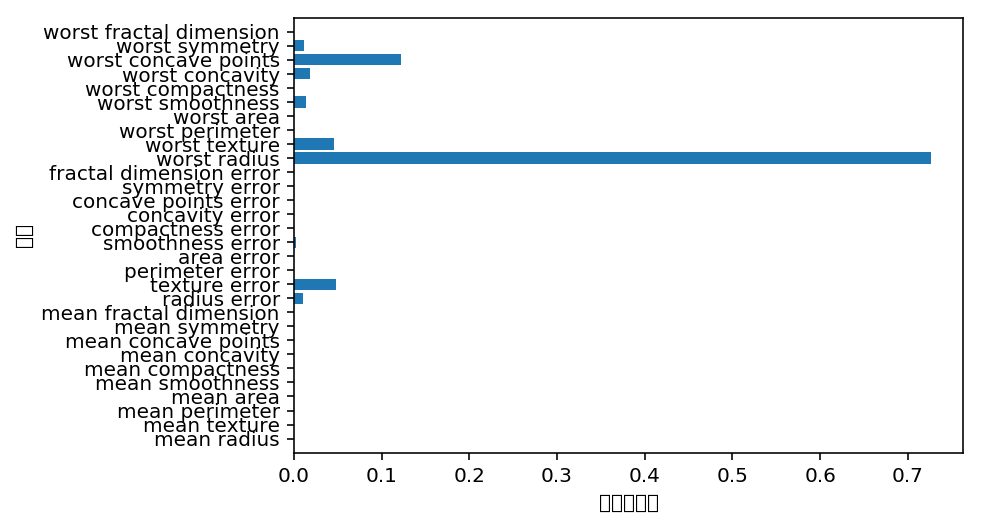

In [16]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


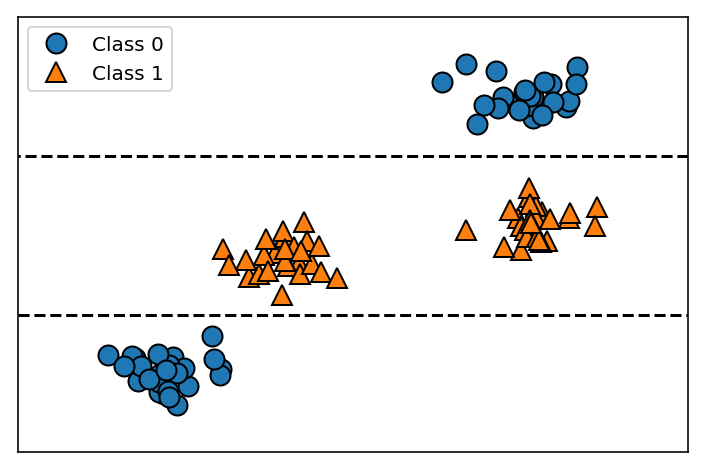

In [17]:
tree = mglearn.plots.plot_tree_not_monotone()
#display(tree)

Text(0,0.5,'가격 ($/Mbyte)')

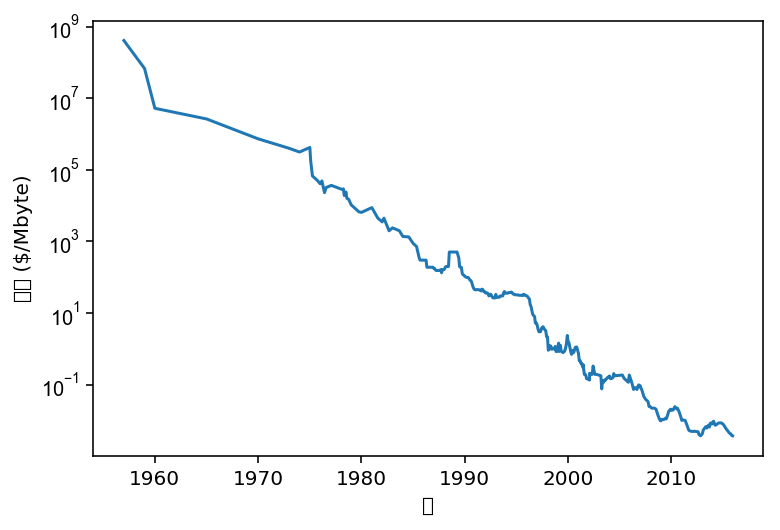

In [18]:
import pandas as pd
# 컴퓨터 메모리 가격 동향 데이터 셋
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:,np.newaxis]
y_train = np.log(data_train.price)

tree= DecisionTreeRegressor().fit(X_train,y_train)
linear_reg= LinearRegression().fit(X_train,y_train)

X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

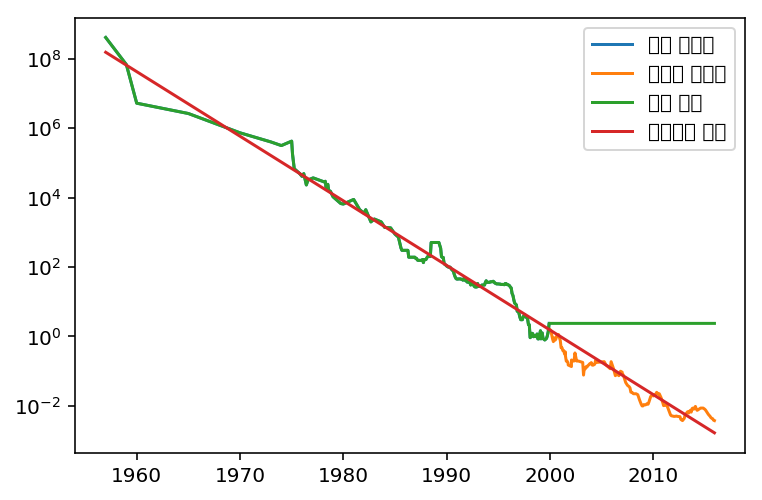

In [20]:
plt.semilogy(data_train.date, data_train.price, label = "훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label = "테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label = "트리 예측")
plt.semilogy(ram_prices.date, price_lr, label = "선형회귀 예측")
plt.legend()

## 2.3.6 결정 트리의 앙상블

In [21]:
# 랜덤 포레스트

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y= make_moons(n_samples=100 , noise =0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

D:\anaconda\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


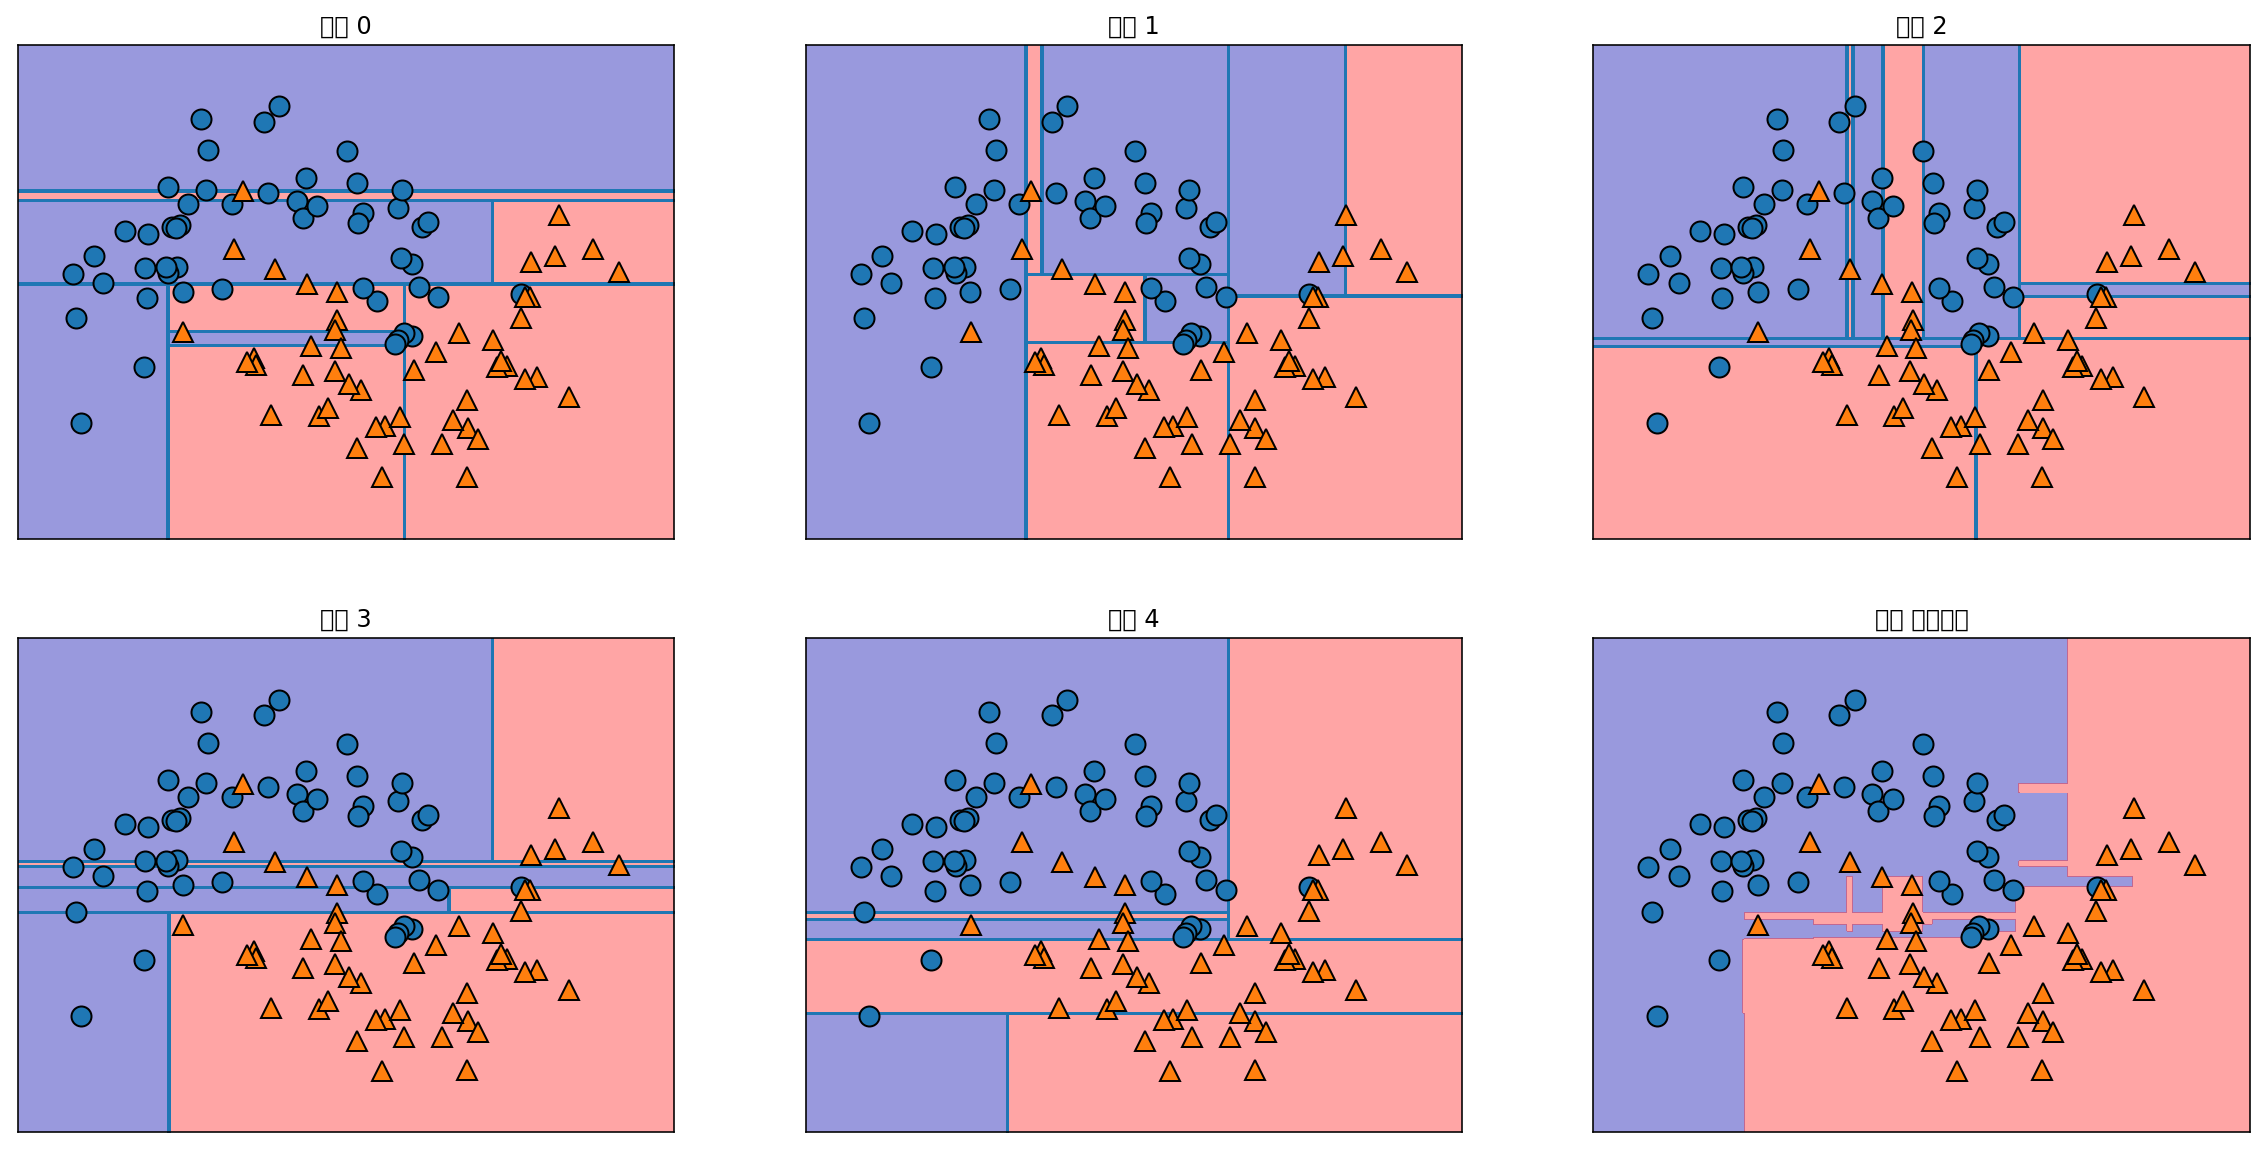

In [22]:
fig, axes =plt.subplots(2,3, figsize =(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest , X, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


D:\anaconda\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


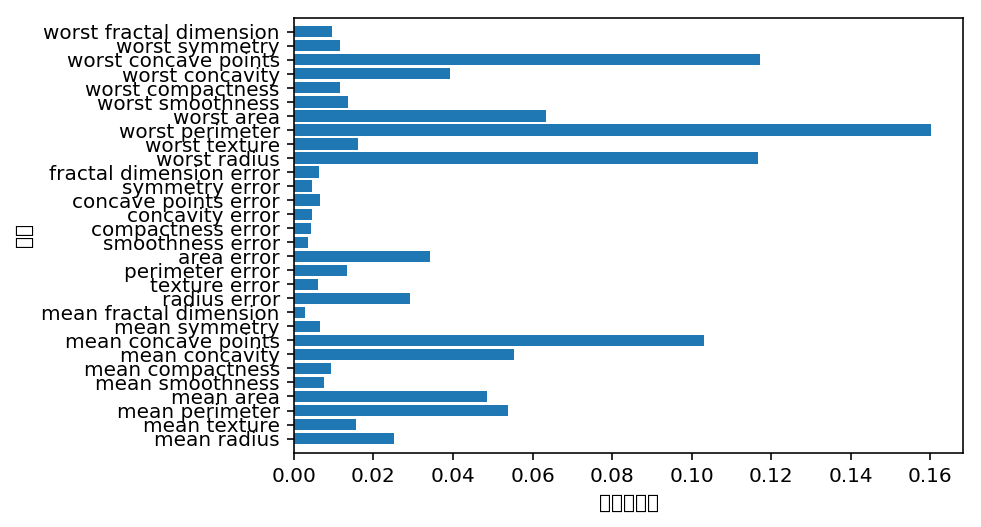

In [24]:
plot_feature_importances_cancer(forest)

In [25]:
#그레디언트 부스틩 회귀 트리
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


In [26]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))


훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


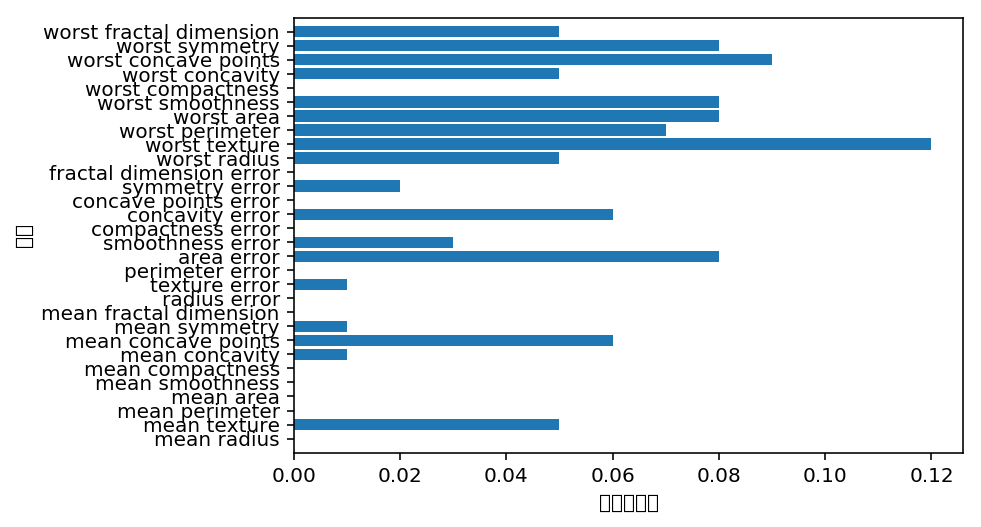

In [27]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

## 2.3.7 배깅, 엑스트라 트리, 에이다부스트

In [33]:
# 예제 데이터set 생성

#from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split( Xm, ym, stratify=ym, random_state=42)

cancer= load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [34]:
# 배깅
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train,yc_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

In [35]:
print("훈련 세트 정확도 : {:.3f}".format(bagging.score(Xc_train,yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(Xc_test,yc_test)))
print("OOB 샘플의 정확도 : {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도 : 0.962
테스트 세트 정확도 : 0.958
OOB 샘플의 정확도 : 0.948


In [36]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train,ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

D:\anaconda\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


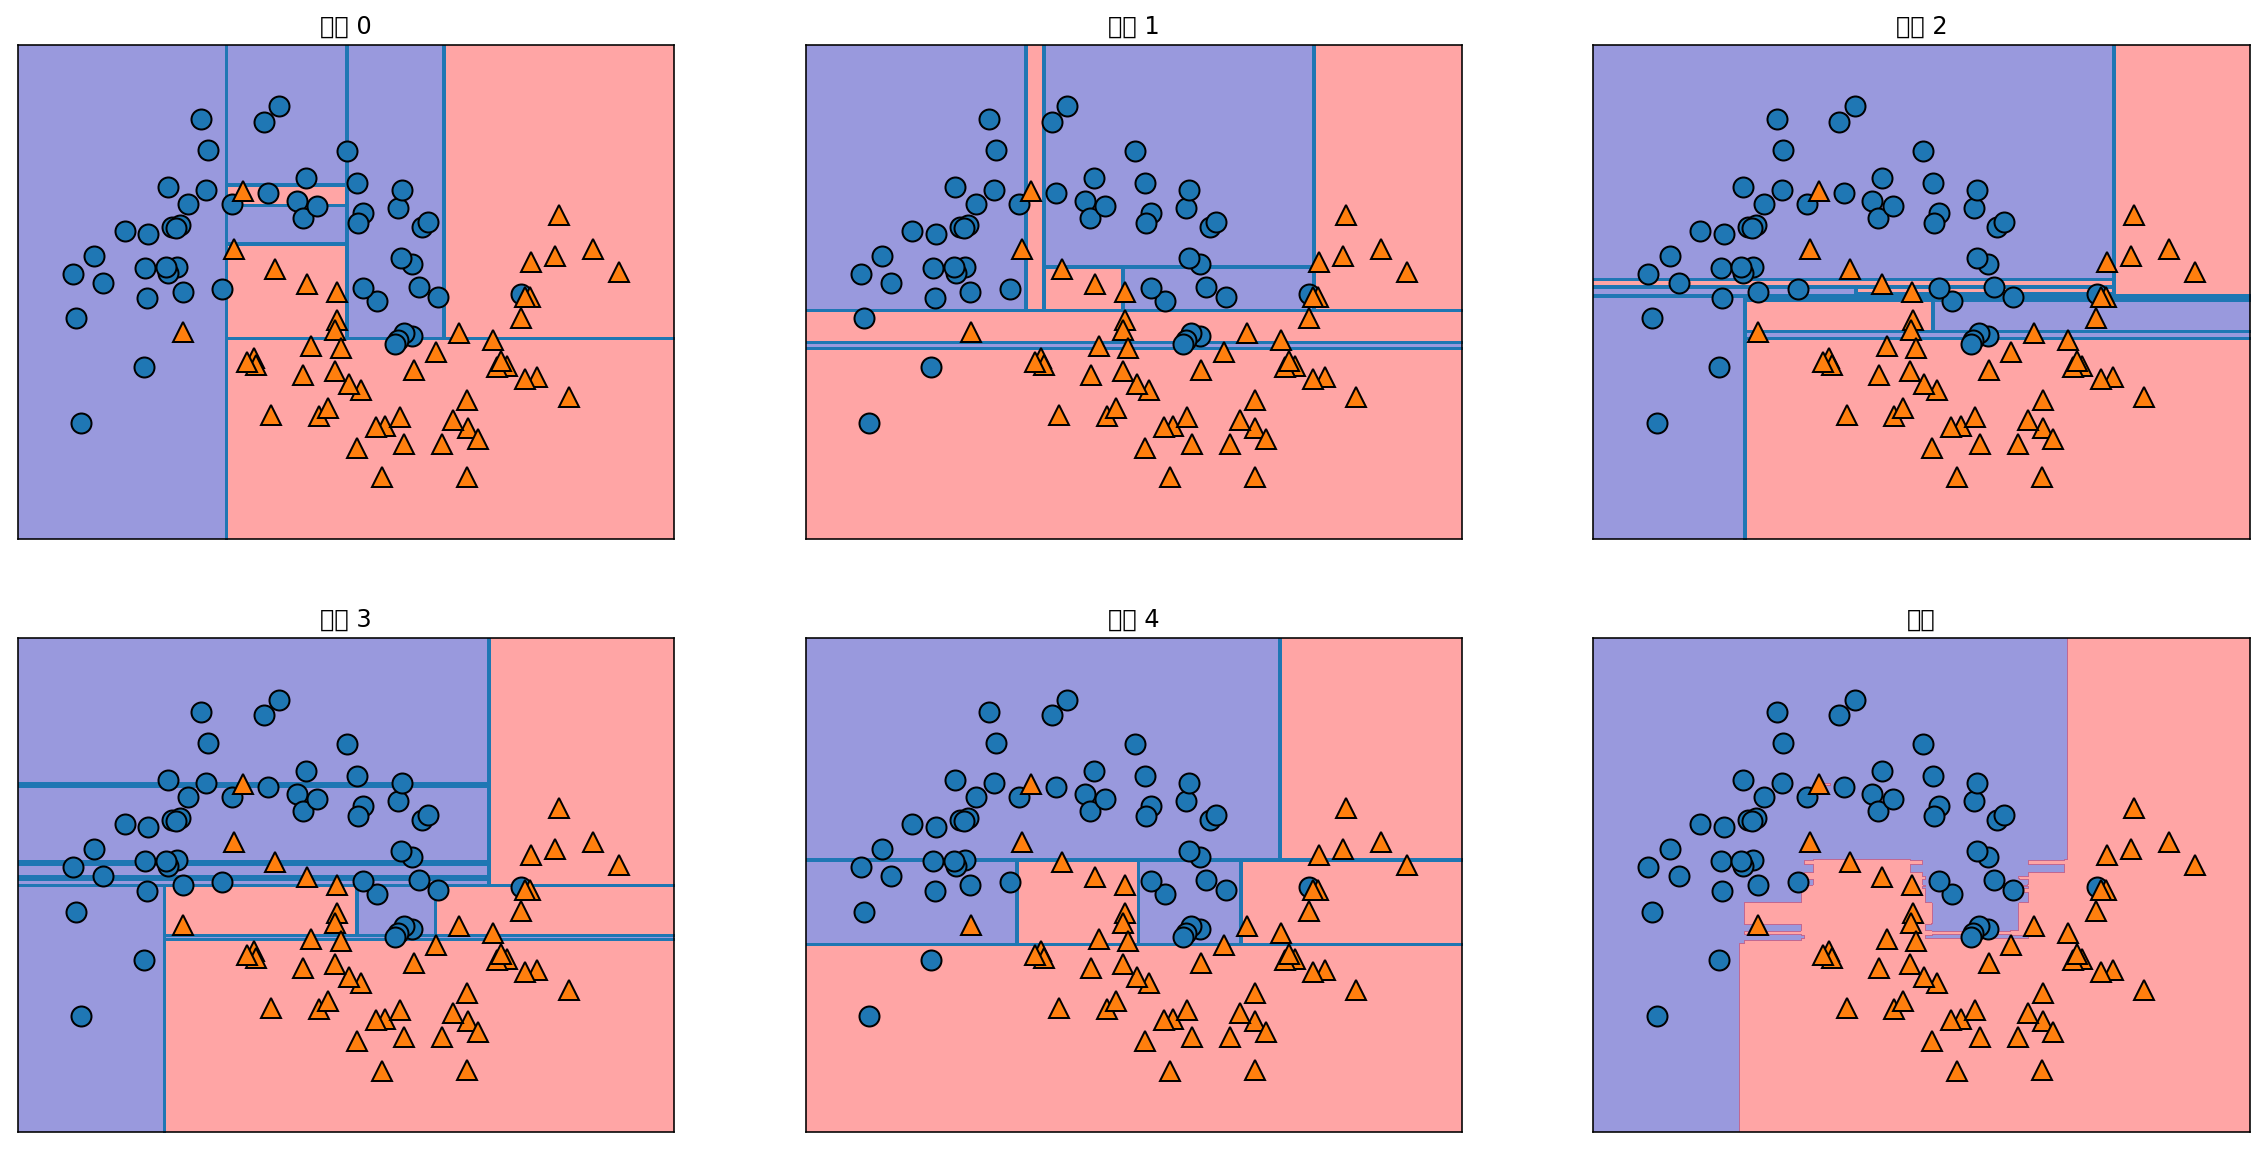

In [37]:
fig, axes =plt.subplots(2,3, figsize =(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plots.plot_2d_separator(bagging , Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("배깅")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [38]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train,yc_train)

print("훈련 세트 정확도 : {:.3f}".format(bagging.score(Xc_train,yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(Xc_test,yc_test)))
print("OOB 샘플의 정확도 : {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965
OOB 샘플의 정확도 : 0.951
